In [4]:
#Load dataset
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
bc = load_breast_cancer()
data = bc.data
labels = np.reshape(bc.target,(569,1))
features = bc.feature_names
features_labels = np.append(features,'label')
final_data = np.concatenate([data,labels],axis=1)
df = pd.DataFrame(final_data)
df.columns = features_labels
df['label'].replace(0, 'Benign',inplace=True)
df['label'].replace(1, 'Malignant',inplace=True)

In [6]:
#Apply PCA: 30 to 2 features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = df.loc[:, features].values
# normalizing: mean=0; std=1
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pC_df = pca.fit_transform(x)
principal_df = pd.DataFrame(data = pC_df,
columns = ['PC1', 'PC2'])
principal_df.tail()
x.shape

(569, 30)

In [9]:
#PCA result: interpretation
print('Explained variation per principal component:{}'.format(pca.explained_variance_ratio_))

Explained variation per principal component:[0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

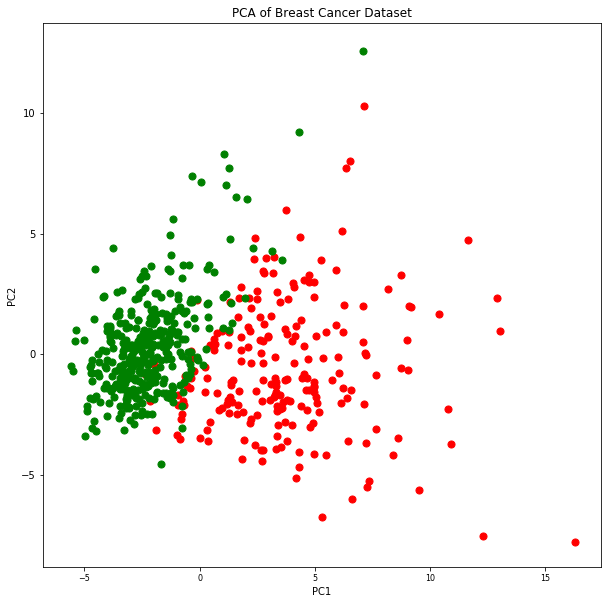

In [18]:
#Visualize 2-dimensional data
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('PC1',fontsize=10)
plt.ylabel('PC2',fontsize=10)
plt.title("PCA of Breast Cancer Dataset",fontsize=12)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['label'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PC1']
                , principal_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

<Figure size 432x288 with 0 Axes>

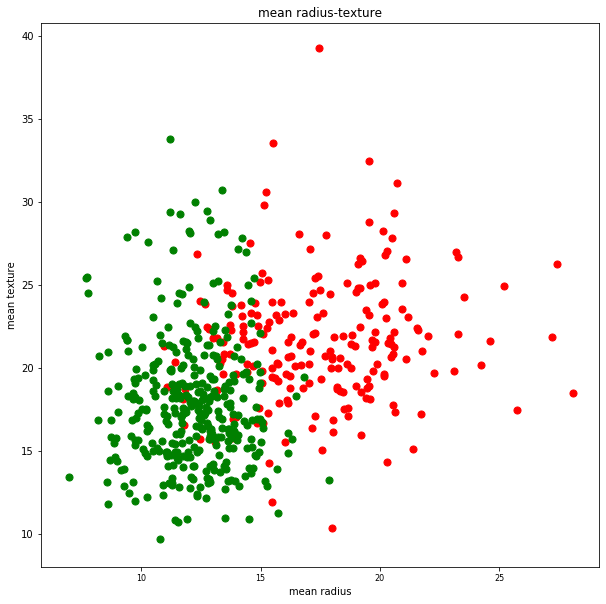

In [26]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('mean radius',fontsize=10)
plt.ylabel('mean texture',fontsize=10)
plt.title("mean radius-texture",fontsize=12)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['label'] == target
    plt.scatter(df.loc[indicesToKeep, 'mean radius']
                , df.loc[indicesToKeep, 'mean texture'], c = color, s = 50)

In [27]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

In [28]:
# define the dictionary of models our script can use
# the key to the dictionary is the name of the model
# (supplied via command line argument) and the value is the model itself
models = {
"knn": KNeighborsClassifier(n_neighbors=1),
"naive_bayes": GaussianNB(),
"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
"svm": SVC(kernel="rbf", gamma="auto"),
"decision_tree": DecisionTreeClassifier(),
"random_forest": RandomForestClassifier(n_estimators=100),
}

In [42]:
# load the Iris dataset and perform a training and testing split
# using 75% of the data for training and 25% for evaluation
print("[INFO] loading data...")
dataset = load_breast_cancer()
(trainX, testX, trainY, testY) = train_test_split(dataset.data,
dataset.target, random_state=3, test_size=0.25)

[INFO] loading data...


In [73]:
# load the Iris dataset and perform a training and testing split
# using 75% of the data for training and 25% for evaluation
print("[INFO] loading data...")
dataset = load_breast_cancer()
(trainX, testX, trainY, testY) = train_test_split(dataset.data,
dataset.target, random_state=3, test_size=0.25)
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models['random_forest']
model.fit(trainX, trainY)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
target_names=dataset.target_names))

[INFO] loading data...
[INFO] evaluating...
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [48]:
#memisahkan data training dan data test untuk hasil PCA
(trainX, testX, trainY, testY) = train_test_split(principal_df,
dataset.target, random_state=3, test_size=0.25)

In [72]:
#memisahkan data training dan data test untuk hasil PCA
(trainX, testX, trainY, testY) = train_test_split(principal_df,
dataset.target, random_state=3, test_size=0.25)
# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models['random_forest']
model.fit(trainX, trainY)
# make predictions on our PCA data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
target_names=dataset.target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

   malignant       0.92      0.89      0.90        53
      benign       0.93      0.96      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features:
mean=0; std=1
y=bc.target
lda = LinearDiscriminantAnalysis(n_components=2)
np_lda=lda.fit(x,y).transform(x)
df_lda=pd.DataFrame(np_lda)
print('Explained variation per principal component:{}'.format(lda.explained_variance_ratio_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Explained variation per principal component:[1.]


In [71]:
#memisahkan data training dan data test untuk hasil LDA
(trainX, testX, trainY, testY) = train_test_split(df_lda,
dataset.target, random_state=3, test_size=0.25)

# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models['random_forest']
model.fit(trainX, trainY)

# make predictions on our LDA data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
target_names=dataset.target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        53
      benign       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [53]:
#memisahkan data training dan data test untuk data asli
(trainX, testX, trainY, testY) = train_test_split(dataset.data,
dataset.target, random_state=3, test_size=0.25)

# train the modelprint("[INFO] using '{}' model".format(model_name))
model = models['naive_bayes']
model.fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
target_names=dataset.target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

   malignant       0.94      0.89      0.91        53
      benign       0.94      0.97      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

